# Part-I: WeatherPy
## Three observable trends based on the data:
### 1. The higher the latitude is, the lower the temperature gets exponentially, and vice versa
### 2. The higher the latitude is, the lower the humidity gets exponentially, and vice versa
### 3. The percentage of cloudiness is scattered almost evenly with both, higher and lower latitude

In [11]:
# Dependencies and Setup
from numpy.random import uniform
import requests
import json
import csv
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from IPython.display import display
from config import api_key
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

lats = list(uniform(-90, 90, 2000))
lons = list(uniform(-180, 180, 2000))

cities_list = []
a = 0
pro_dir = ''
date = datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")

## Generate Cities List

In [2]:
print('starting...')

with open(pro_dir + '../selected_cities/selected_cities.csv', mode = 'w', newline = '') as city_file:
    city_writer = csv.writer(city_file, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    city_writer.writerow(['City Name',
                          'Latitude',
                          'Longitude',
                          'Temperature (F)',
                          'Max. Temp (F)',
                          'Min. Temp (F)',
                          'Humidity (%)',
                          'Cloudiness (%)',
                          'Wind Speed (mph)',
                          'Country Code', 'Date & Time']
                        )
    for j in range(2000):
        lat = lats[j]
        lon = lons[j]
        
        city = citipy.nearest_city(lat, lon)
        city_name = city.city_name
        print('Fetching and processing record for: ', city_name)

        url = "https://api.openweathermap.org/data/2.5/weather?q=%s&appid=%s&units=imperial" % (city_name, api_key)
        
        if not city_name in cities_list:
            response = requests.get(url)
            data = json.loads(response.text)
            try:
                to_save = [city_name,
                           data['coord']['lat'],
                           data['coord']['lon'],
                           data['main']['temp'],
                           data['main']['temp_max'],
                           data['main']['temp_min'],
                           data['main']['humidity'],
                           data['clouds']['all'],
                           data['wind']['speed'],
                           data['sys']['country'],
                           datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")
                          ]
                city_writer.writerow(to_save)
                cities_list.append(city_name)
                a+=1
            except:
                print(data['message'] + '!')

        if a == 500:
            break

print('Total Cites: ', len(cities_list))

starting...
Fetching and processing record for:  georgetown
Fetching and processing record for:  phalaborwa
Fetching and processing record for:  mataura
Fetching and processing record for:  karpathos
Fetching and processing record for:  puerto ayora
Fetching and processing record for:  rikitea
Fetching and processing record for:  bluff
Fetching and processing record for:  wanaka
Fetching and processing record for:  aykhal
Fetching and processing record for:  tasiilaq
Fetching and processing record for:  cape town
Fetching and processing record for:  kruisfontein
Fetching and processing record for:  ossora
Fetching and processing record for:  darab
Fetching and processing record for:  punta arenas
Fetching and processing record for:  illoqqortoormiut
city not found!
Fetching and processing record for:  rikitea
Fetching and processing record for:  port alfred
Fetching and processing record for:  hermanus
Fetching and processing record for:  pacific grove
Fetching and processing record fo

Fetching and processing record for:  porto empedocle
Fetching and processing record for:  ushuaia
Fetching and processing record for:  lompoc
Fetching and processing record for:  vaini
Fetching and processing record for:  namibe
Fetching and processing record for:  tucuman
Fetching and processing record for:  busselton
Fetching and processing record for:  copiapo
Fetching and processing record for:  provideniya
Fetching and processing record for:  chengde
Fetching and processing record for:  sungaipenuh
Fetching and processing record for:  punta arenas
Fetching and processing record for:  mataura
Fetching and processing record for:  linshui
Fetching and processing record for:  rikitea
Fetching and processing record for:  saint-philippe
Fetching and processing record for:  sidney
Fetching and processing record for:  rikitea
Fetching and processing record for:  kamenka
Fetching and processing record for:  barentsburg
city not found!
Fetching and processing record for:  spornoye
Fetching 

Fetching and processing record for:  puerto ayora
Fetching and processing record for:  askino
Fetching and processing record for:  hobart
Fetching and processing record for:  mataura
Fetching and processing record for:  bredasdorp
Fetching and processing record for:  rikitea
Fetching and processing record for:  mahebourg
Fetching and processing record for:  cherskiy
Fetching and processing record for:  sarh
Fetching and processing record for:  albany
Fetching and processing record for:  mataura
Fetching and processing record for:  busselton
Fetching and processing record for:  punta arenas
Fetching and processing record for:  kahama
Fetching and processing record for:  yulara
Fetching and processing record for:  thinadhoo
Fetching and processing record for:  atuona
Fetching and processing record for:  pudozh
Fetching and processing record for:  rikitea
Fetching and processing record for:  saint-philippe
Fetching and processing record for:  mataura
Fetching and processing record for:  l

city not found!
Fetching and processing record for:  hofn
Fetching and processing record for:  vestbygda
city not found!
Fetching and processing record for:  punta arenas
Fetching and processing record for:  cape town
Fetching and processing record for:  mar del plata
Fetching and processing record for:  yulara
Fetching and processing record for:  santa cruz de la palma
Fetching and processing record for:  mar del plata
Fetching and processing record for:  alice springs
Fetching and processing record for:  castro
Fetching and processing record for:  medea
Fetching and processing record for:  tiksi
Fetching and processing record for:  bolungarvik
city not found!
Fetching and processing record for:  castro
Fetching and processing record for:  esna
Fetching and processing record for:  cape town
Fetching and processing record for:  ushuaia
Fetching and processing record for:  nikolskoye
Fetching and processing record for:  olafsvik
Fetching and processing record for:  vasilsursk
Fetching a

city not found!
Fetching and processing record for:  mae hong son
Fetching and processing record for:  clyde river
Fetching and processing record for:  kapaa
Fetching and processing record for:  samarai
Fetching and processing record for:  chuy
Fetching and processing record for:  ushuaia
Fetching and processing record for:  ribeira grande
Fetching and processing record for:  yellowknife
Fetching and processing record for:  arraial do cabo
Fetching and processing record for:  porto santo
Fetching and processing record for:  rawson
Fetching and processing record for:  katsuura
Fetching and processing record for:  mataura
Fetching and processing record for:  georgetown
Fetching and processing record for:  mabaruma
Fetching and processing record for:  cockburn town
Fetching and processing record for:  laguna
Fetching and processing record for:  acarau
Fetching and processing record for:  sorland
Fetching and processing record for:  okhotsk
Fetching and processing record for:  atuona
Fetch

Fetching and processing record for:  inirida
Fetching and processing record for:  avarua
Fetching and processing record for:  mataura
Fetching and processing record for:  hilo
Fetching and processing record for:  port alfred
Fetching and processing record for:  taolanaro
city not found!
Fetching and processing record for:  utiroa
city not found!
Fetching and processing record for:  dayong
Fetching and processing record for:  vaini
Fetching and processing record for:  takapau
Fetching and processing record for:  illoqqortoormiut
city not found!
Fetching and processing record for:  bonavista
Fetching and processing record for:  carnarvon
Fetching and processing record for:  avarua
Fetching and processing record for:  te anau
Fetching and processing record for:  georgetown
Fetching and processing record for:  saint-philippe
Fetching and processing record for:  mataura
Fetching and processing record for:  straseni
Fetching and processing record for:  barentsburg
city not found!
Fetching an

Fetching and processing record for:  san cristobal
Fetching and processing record for:  palana
Fetching and processing record for:  punta arenas
Fetching and processing record for:  cherskiy
Fetching and processing record for:  harper
Fetching and processing record for:  dingle
Fetching and processing record for:  vaini
Fetching and processing record for:  hobart
Fetching and processing record for:  thunder bay
Fetching and processing record for:  chokurdakh
Fetching and processing record for:  sri aman
Fetching and processing record for:  galiwinku
city not found!
Fetching and processing record for:  taolanaro
city not found!
Fetching and processing record for:  dikson
Fetching and processing record for:  west bay
Fetching and processing record for:  illoqqortoormiut
city not found!
Fetching and processing record for:  hobart
Fetching and processing record for:  mahebourg
Fetching and processing record for:  rikitea
Fetching and processing record for:  iqaluit
Fetching and processing 

Fetching and processing record for:  rikitea
Fetching and processing record for:  san quintin
Fetching and processing record for:  ushuaia
Fetching and processing record for:  barrow
Fetching and processing record for:  hermanus
Fetching and processing record for:  pisco
Fetching and processing record for:  ilulissat
Fetching and processing record for:  barentsburg
city not found!
Fetching and processing record for:  isangel
Fetching and processing record for:  verkhovazhye
Fetching and processing record for:  collie
Fetching and processing record for:  mahebourg
Fetching and processing record for:  punta arenas
Fetching and processing record for:  kurilsk
Fetching and processing record for:  mbuji-mayi
Fetching and processing record for:  port alfred
Fetching and processing record for:  moba
Fetching and processing record for:  muroto
Fetching and processing record for:  atuona
Fetching and processing record for:  ushuaia
Fetching and processing record for:  coihaique
Fetching and pro

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

## Convert Raw Data to DataFrame
* Export the city data into a CSV file
* Display the DataFrame

In [3]:
cities_path = "../selected_cities/selected_cities.csv"

# Read the 'Cities' data that we just stored in a CSV file.
cities_data = pd.read_csv(pro_dir + cities_path)
display(cities_data)

,City Name,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
0,georgetown,5.4112,100.3354,74.93,77.00,73.00,88,40,3.44,MY,14-01-2021 11:49:31
1,phalaborwa,-23.9430,31.1411,75.20,75.20,75.20,83,47,6.91,ZA,14-01-2021 11:49:32
2,mataura,-46.1927,168.8643,78.73,78.73,78.73,41,0,2.89,NZ,14-01-2021 11:49:33
3,karpathos,35.5070,27.2132,59.00,59.00,59.00,72,1,29.93,GR,14-01-2021 11:49:34
4,puerto ayora,-0.7393,-90.3518,75.99,75.99,75.99,91,95,7.00,EC,14-01-2021 11:49:35
...,...,...,...,...,...,...,...,...,...,...,...
495,baghdad,33.3406,44.4009,58.17,58.17,58.17,35,100,11.27,IQ,14-01-2021 12:00:47
496,fare,-16.7000,-151.0167,81.52,81.52,81.52,75,75,16.40,PF,14-01-2021 12:00:53
497,pitimbu,-7.4706,-34.8086,78.80,78.80,78.80,83,20,4.61,BR,14-01-2021 12:00:54
498,poum,-20.2333,164.0167,81.75,81.75,81.75,82,100,15.97,NC,14-01-2021 12:00:56


In [4]:
described_data = cities_data.describe()
display(described_data)

,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,19.099406,22.326274,48.445180,48.946540,47.909360,74.850000,54.100000,8.227860
std,34.432105,94.382811,32.905591,33.056612,32.816864,18.248988,41.425864,5.767898
min,-54.800000,-175.200000,-44.950000,-44.950000,-44.950000,10.000000,0.000000,0.360000
25%,-10.151075,-62.294425,30.200000,30.200000,28.400000,66.000000,2.000000,3.620000
50%,24.854300,27.958200,59.305000,60.780000,58.685000,79.000000,71.000000,6.815000
75%,47.751350,110.553475,74.992500,75.200000,74.252500,88.000000,99.000000,11.500000
max,78.218600,178.416700,98.600000,98.600000,98.600000,100.000000,100.000000,42.570000


## Inspect the data and remove the cities where the humidity > 100%
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# There is no city with humidity greated than 100% but still for understanding, 
# following is the method to take only ones that are greater or equal to 100% humidity.

cities_data_removed_g100_humidity = cities_data[cities_data['Humidity (%)'] <= 100]
print(cities_data_removed_g100_humidity.shape)
display(cities_data_removed_g100_humidity)

(500, 11)


,City Name,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
0,georgetown,5.4112,100.3354,74.93,77.00,73.00,88,40,3.44,MY,14-01-2021 11:49:31
1,phalaborwa,-23.9430,31.1411,75.20,75.20,75.20,83,47,6.91,ZA,14-01-2021 11:49:32
2,mataura,-46.1927,168.8643,78.73,78.73,78.73,41,0,2.89,NZ,14-01-2021 11:49:33
3,karpathos,35.5070,27.2132,59.00,59.00,59.00,72,1,29.93,GR,14-01-2021 11:49:34
4,puerto ayora,-0.7393,-90.3518,75.99,75.99,75.99,91,95,7.00,EC,14-01-2021 11:49:35
...,...,...,...,...,...,...,...,...,...,...,...
495,baghdad,33.3406,44.4009,58.17,58.17,58.17,35,100,11.27,IQ,14-01-2021 12:00:47
496,fare,-16.7000,-151.0167,81.52,81.52,81.52,75,75,16.40,PF,14-01-2021 12:00:53
497,pitimbu,-7.4706,-34.8086,78.80,78.80,78.80,83,20,4.61,BR,14-01-2021 12:00:54
498,poum,-20.2333,164.0167,81.75,81.75,81.75,82,100,15.97,NC,14-01-2021 12:00:56


In [6]:
# Get the indices of cities that have humidity over 100%.
# There is no such value in our data but the method is as follow:

indexs_hum_g100 = cities_data[cities_data['Humidity (%)'] > 100].index
print(indexs_hum_g100)

Int64Index([], dtype='int64')


In [7]:
# Making a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace = False" will make a copy of the 'city_data' DataFrame, which we call "clean_city_data".

q1 = cities_data['Humidity (%)'].quantile(0.25)
q3 = cities_data['Humidity (%)'].quantile(0.75)
iqr = q3-q1

# For our understanding, let's find out the outlier data as well.
cities_with_humid_outliers_1 = cities_data[cities_data['Humidity (%)'] < (q1 - 1.5 * iqr)]
cities_with_humid_outliers_2 =cities_data[cities_data['Humidity (%)'] > (q3 + 1.5 * iqr)]
cities_with_humid_outliers = pd.concat([cities_with_humid_outliers_1, cities_with_humid_outliers_2])

# Take the data with no outliers in humidity - 'clean_cities_data'
cities_without_humid_outliers_1 = cities_data[cities_data['Humidity (%)'] > (q1 - 1.5 * iqr)]
clean_cities_data = cities_without_humid_outliers_1[cities_without_humid_outliers_1['Humidity (%)']  < (q3 + 1.5 * iqr)]

print('Outliers Shape:', cities_with_humid_outliers.shape, '\nClean City Data Shape:', clean_cities_data.shape)
display(clean_cities_data)
display(cities_with_humid_outliers)

Outliers Shape: (23, 11) 
Clean City Data Shape: (477, 11)


,City Name,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
0,georgetown,5.4112,100.3354,74.93,77.00,73.00,88,40,3.44,MY,14-01-2021 11:49:31
1,phalaborwa,-23.9430,31.1411,75.20,75.20,75.20,83,47,6.91,ZA,14-01-2021 11:49:32
2,mataura,-46.1927,168.8643,78.73,78.73,78.73,41,0,2.89,NZ,14-01-2021 11:49:33
3,karpathos,35.5070,27.2132,59.00,59.00,59.00,72,1,29.93,GR,14-01-2021 11:49:34
4,puerto ayora,-0.7393,-90.3518,75.99,75.99,75.99,91,95,7.00,EC,14-01-2021 11:49:35
...,...,...,...,...,...,...,...,...,...,...,...
495,baghdad,33.3406,44.4009,58.17,58.17,58.17,35,100,11.27,IQ,14-01-2021 12:00:47
496,fare,-16.7000,-151.0167,81.52,81.52,81.52,75,75,16.40,PF,14-01-2021 12:00:53
497,pitimbu,-7.4706,-34.8086,78.80,78.80,78.80,83,20,4.61,BR,14-01-2021 12:00:54
498,poum,-20.2333,164.0167,81.75,81.75,81.75,82,100,15.97,NC,14-01-2021 12:00:56


,City Name,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
20,mount isa,-20.7333,139.5000,93.20,93.20,93.20,29,0,11.50,AU,14-01-2021 11:49:52
22,geraldton,-28.7667,114.6000,84.20,84.20,84.20,28,0,16.11,AU,14-01-2021 11:49:54
28,redlands,34.0556,-117.1825,68.13,75.20,54.00,15,75,4.61,US,14-01-2021 11:47:13
32,kayes,14.0000,-11.0000,75.42,75.42,75.42,18,0,6.78,ML,14-01-2021 11:50:08
65,bousso,10.4795,16.7117,67.26,67.26,67.26,23,71,6.53,TD,14-01-2021 11:50:57
90,taoudenni,22.6783,-3.9836,59.11,59.11,59.11,32,0,14.83,ML,14-01-2021 11:51:28
101,new norfolk,-42.7826,147.0587,67.42,71.01,64.00,32,30,8.99,AU,14-01-2021 11:51:42
186,yulara,-25.2406,130.9889,95.00,95.00,95.00,17,0,17.27,AU,14-01-2021 11:53:28
223,dera bugti,29.0307,69.1510,53.35,53.35,53.35,32,100,2.53,PK,14-01-2021 11:54:16
249,riyadh,24.6877,46.7219,48.00,50.00,44.60,29,0,3.62,SA,14-01-2021 11:49:58


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature (F) vs. Latitude Scatter Plot

Date & Time: 14-01-2021 12:00:57


<Figure size 432x288 with 0 Axes>

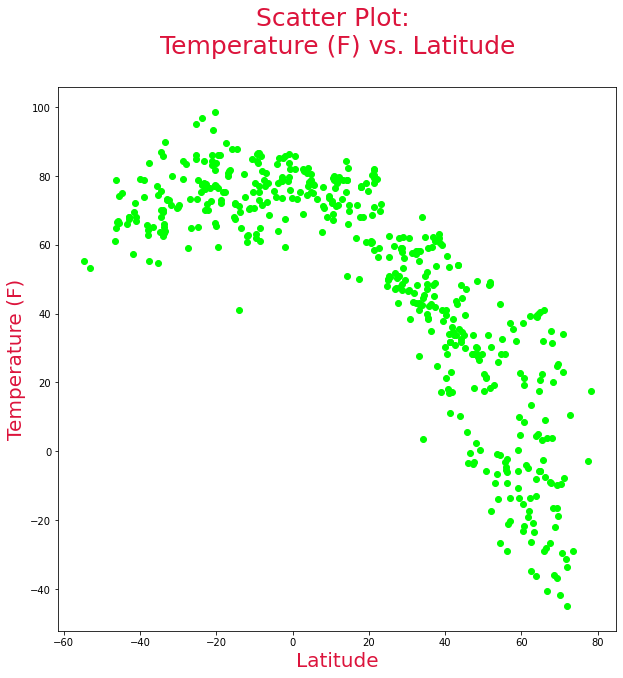

Note: This scatter plot is analyzing the relation between temperature (F) and latitude.


In [41]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data['Latitude'], cities_data['Temperature (F)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'crimson')
plt.ylabel('Temperature (F)', fontsize = 20, c = 'crimson')
plt.title('Scatter Plot: \n Temperature (F) vs. Latitude \n', fontsize = 25, c = 'crimson')
plt.savefig(pro_dir + 'output_images/01_scatter_plot_temp_vs_lat.png')
print(f'Date & Time: ' + (date))
plt.show()
print('Note: This scatter plot is analyzing the relation between temperature (F) and latitude.')

## Humidity (%) vs. Latitude Scatter Plot

Date & Time: 14-01-2021 12:00:57


<Figure size 432x288 with 0 Axes>

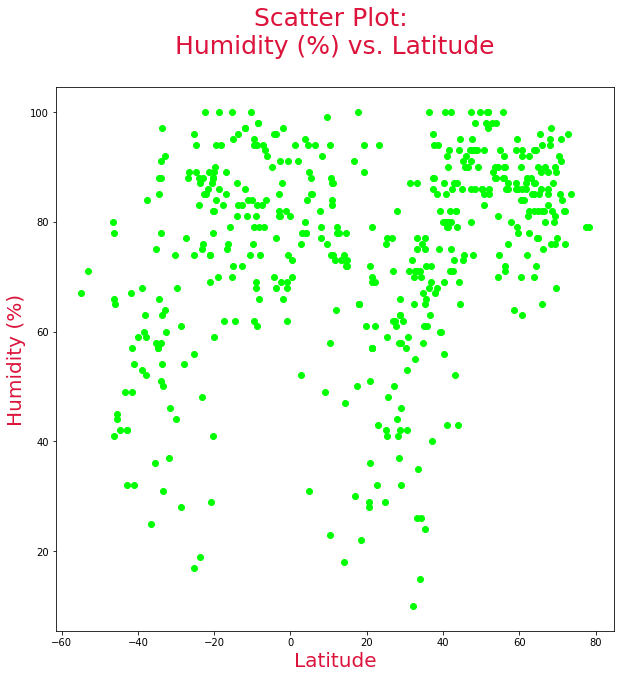

Note: This scatter plot is analyzing the relation between humidity (%) and latitude.


In [40]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data['Latitude'], cities_data['Humidity (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'crimson')
plt.ylabel('Humidity (%)', fontsize = 20, c = 'crimson')
plt.title('Scatter Plot: \n Humidity (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
plt.savefig(pro_dir + 'output_images/02_scatter_plot_humid_vs_lat.png')
print(f'Date & Time: ' + (date))
plt.show()
print('Note: This scatter plot is analyzing the relation between humidity (%) and latitude.')

## Cloudiness (%) vs. Latitude Scatter Plot

Date & Time: 14-01-2021 12:00:57


<Figure size 432x288 with 0 Axes>

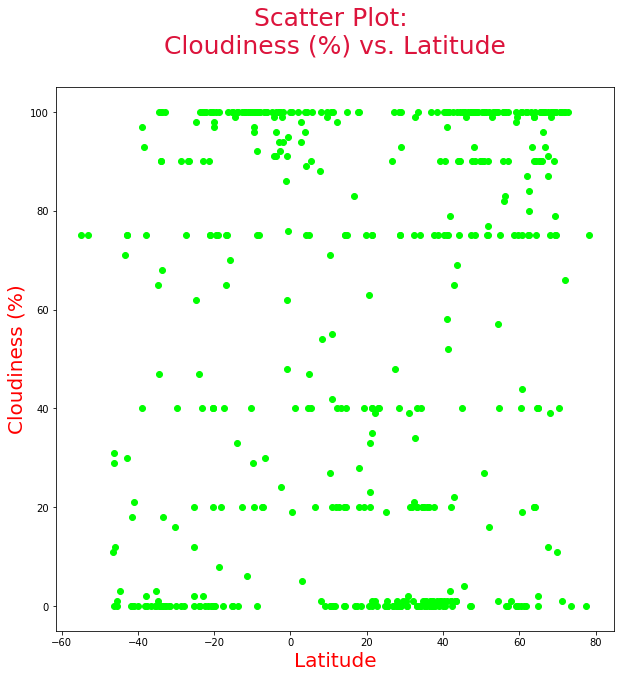

Note: This scatter plot is analyzing the relation between cloudiness (%) and latitude.


In [42]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data['Latitude'], cities_data['Cloudiness (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Cloudiness (%)', fontsize = 20, c = 'r')
plt.title('Scatter Plot: \n Cloudiness (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
plt.savefig(pro_dir + 'output_images/03_scatter_plot_cloud_vs_lat.png')
print(f'Date & Time: ' + (date))
plt.show()
print('Note: This scatter plot is analyzing the relation between cloudiness (%) and latitude.')

## Wind Speed (mph) vs. Latitude Scatter Plot

Date & Time: 14-01-2021 12:00:57


<Figure size 432x288 with 0 Axes>

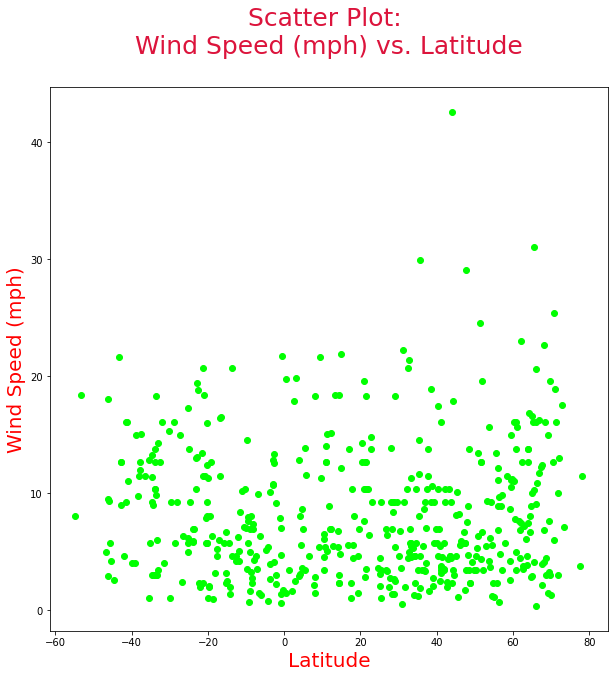

Note: This scatter plot is analyzing the relation between wind speed (mph) and latitude.


In [43]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data['Latitude'], cities_data['Wind Speed (mph)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Wind Speed (mph)', fontsize = 20, c = 'r')
plt.title('Scatter Plot: \n Wind Speed (mph) vs. Latitude \n', fontsize = 25, c = 'crimson')
plt.savefig(pro_dir + 'output_images/04_scatter_plot_windspeed_vs_lat.png')
print(f'Date & Time: ' + (date))
plt.show()
print('Note: This scatter plot is analyzing the relation between wind speed (mph) and latitude.')

## Linear Regression:
###  Northern Hemisphere - Temperature (F) vs. Latitude

Regression: 0.7382435364035802
Date & Time: 14-01-2021 12:00:57


<Figure size 432x288 with 0 Axes>

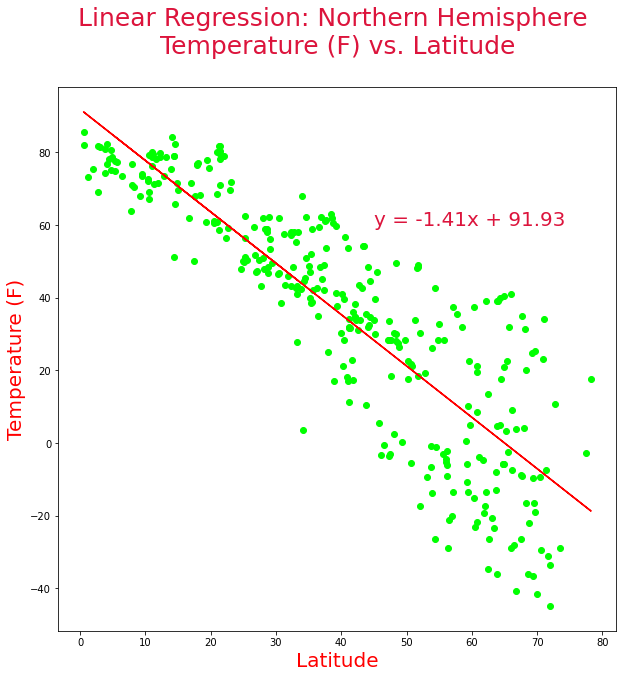

Note: This linear regression is showing the relation between temperature (F) and latitude in Northern Hemisphere.


In [44]:
# Separating cities for Northen and Southern Hemisphere
cities_data_n_hem = cities_data[cities_data.Latitude >= 0]
cities_data_s_hem = cities_data[cities_data.Latitude < 0]

#print(cities_data_n_hem.shape,cities_data_s_hem.shape)
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_n_hem['Latitude'], cities_data_n_hem['Temperature (F)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Temperature (F)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Northern Hemisphere \n Temperature (F) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_n_hem['Latitude'], cities_data_n_hem['Temperature (F)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_n_hem['Latitude'], slope * cities_data_n_hem['Latitude'] + intercept, color = 'red')

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (45, 60), fontsize = 20, color = "crimson")

plt.savefig(pro_dir + 'output_images/05_regression_northern_temp_vs_lat.png')
print(f'Date & Time: ' + (date))
plt.show()
print('Note: This linear regression is showing the relation between temperature (F) and latitude in Northern Hemisphere.')

## Linear Regression:
###  Southern Hemisphere - Temperature (F) vs. Latitude

Regression: 0.09703196673723358
Date & Time: 14-01-2021 12:00:57


<Figure size 432x288 with 0 Axes>

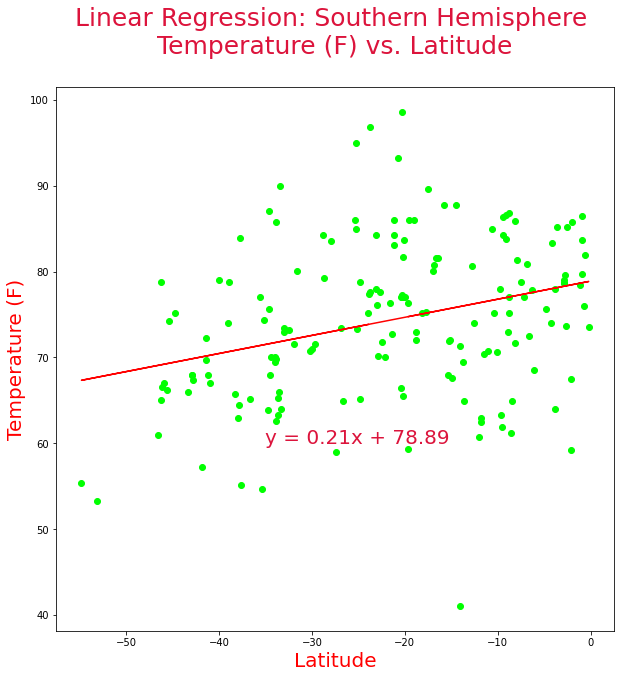

Note: This linear regression is showing the relation between temperature (F) and latitude in Southern Hemisphere.


In [45]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_s_hem['Latitude'], cities_data_s_hem['Temperature (F)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Temperature (F)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Southern Hemisphere \n Temperature (F) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_s_hem['Latitude'], cities_data_s_hem['Temperature (F)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_s_hem['Latitude'], slope * cities_data_s_hem['Latitude'] + intercept, color = 'red')

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (-35, 60), fontsize = 20, color = "crimson")

plt.savefig(pro_dir + 'output_images/06_regression_southern_temp_vs_lat.png')
print(f'Date & Time: ' + (date))
plt.show()
print('Note: This linear regression is showing the relation between temperature (F) and latitude in Southern Hemisphere.')

## LINEAR REGRESSION:
###  Northern Hemisphere - Humidity (%) vs. Latitude

Regression: 0.13664741194587737
Date & Time: 14-01-2021 12:00:57


<Figure size 432x288 with 0 Axes>

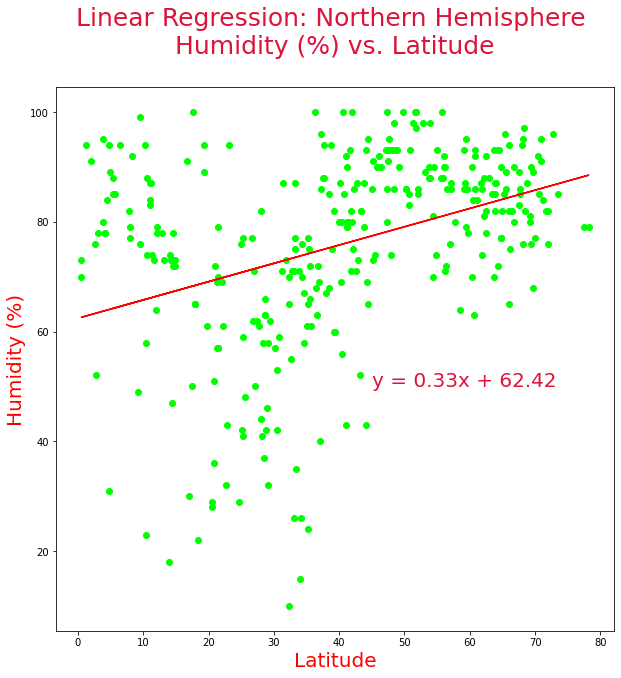

Note: This linear regression is showing the relation between humidity (%) and latitude in Northern Hemisphere.


In [46]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_n_hem['Latitude'], cities_data_n_hem['Humidity (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Humidity (%)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Northern Hemisphere \n Humidity (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_n_hem['Latitude'], cities_data_n_hem['Humidity (%)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_n_hem['Latitude'], slope * cities_data_n_hem['Latitude'] + intercept, color = 'red')

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (45, 50), fontsize = 20, color = "crimson")

plt.savefig(pro_dir + 'output_images/07_regression_northern_humid_vs_lat.png')
print(f'Date & Time: ' + (date))
plt.show()
print('Note: This linear regression is showing the relation between humidity (%) and latitude in Northern Hemisphere.')

## Linear Regression:
###  Southern Hemisphere - Humidity (%) vs. Latitude

Regression: 0.24664617664667438
Date & Time: 14-01-2021 12:00:57


<Figure size 432x288 with 0 Axes>

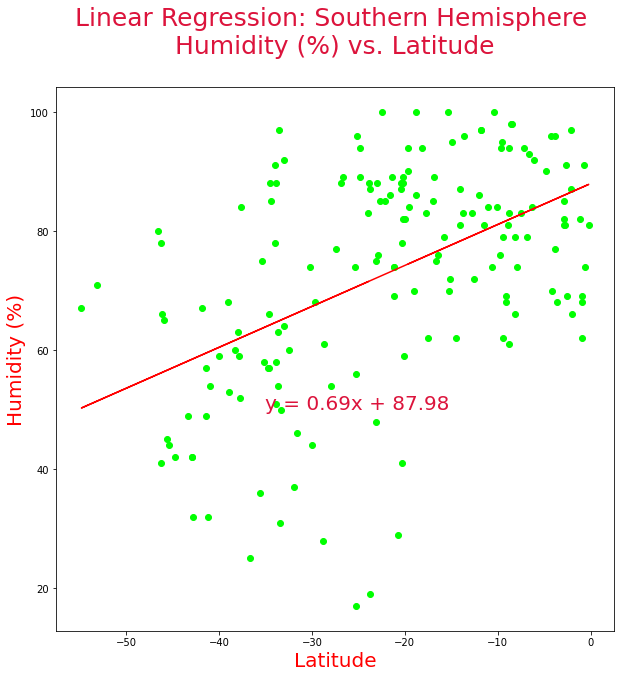

Note: This linear regression is showing the relation between humidity (%) and latitude in Southern Hemisphere.


In [50]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_s_hem['Latitude'], cities_data_s_hem['Humidity (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Humidity (%)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Southern Hemisphere \n Humidity (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_s_hem['Latitude'], cities_data_s_hem['Humidity (%)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_s_hem['Latitude'], slope * cities_data_s_hem['Latitude'] + intercept, color = 'red')

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (-35, 50), fontsize = 20, color = "crimson")

plt.savefig(pro_dir + 'output_images/08_regression_southern_humid_vs_lat.png')
print(f'Date & Time: ' + (date))
plt.show()
print('Note: This linear regression is showing the relation between humidity (%) and latitude in Southern Hemisphere.')

## Linear Regression:
###  Northern Hemisphere - Cloudiness (%) vs. Latitude

Regression: 0.06952140166895528
Date & Time: 14-01-2021 12:00:57


<Figure size 432x288 with 0 Axes>

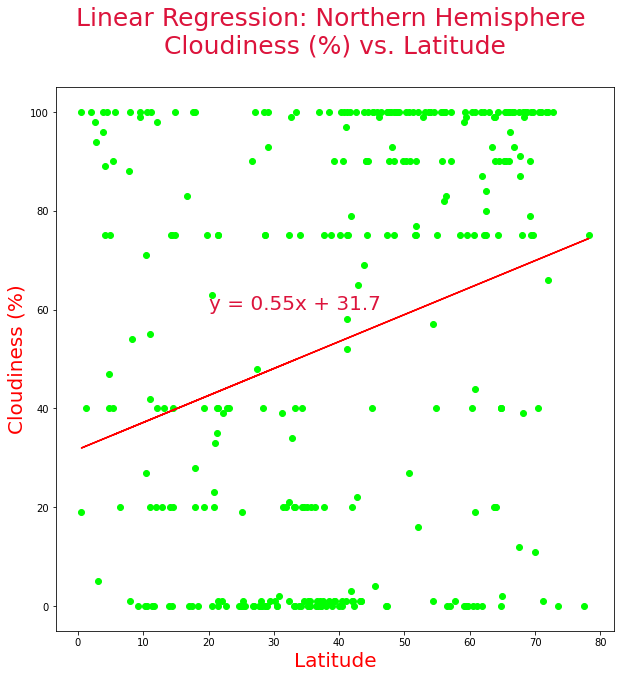

Note: This linear regression is showing the relation between cloudiness (%) and latitude in Northern Hemisphere.


In [51]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_n_hem['Latitude'], cities_data_n_hem['Cloudiness (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Cloudiness (%)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Northern Hemisphere \n Cloudiness (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_n_hem['Latitude'], cities_data_n_hem['Cloudiness (%)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_n_hem['Latitude'], slope * cities_data_n_hem['Latitude'] + intercept, color = 'red')

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (20, 60), fontsize = 20, color = "crimson")

plt.savefig(pro_dir + 'output_images/09_regression_northern_cloud_vs_lat.png')
print(f'Date & Time: ' + (date))
plt.show()
print('Note: This linear regression is showing the relation between cloudiness (%) and latitude in Northern Hemisphere.')

## Linear Regression:
###  Southern Hemisphere - Cloudiness (%) vs. Latitude

Regression: 0.21281483901191067
Date & Time: 14-01-2021 12:00:57


<Figure size 432x288 with 0 Axes>

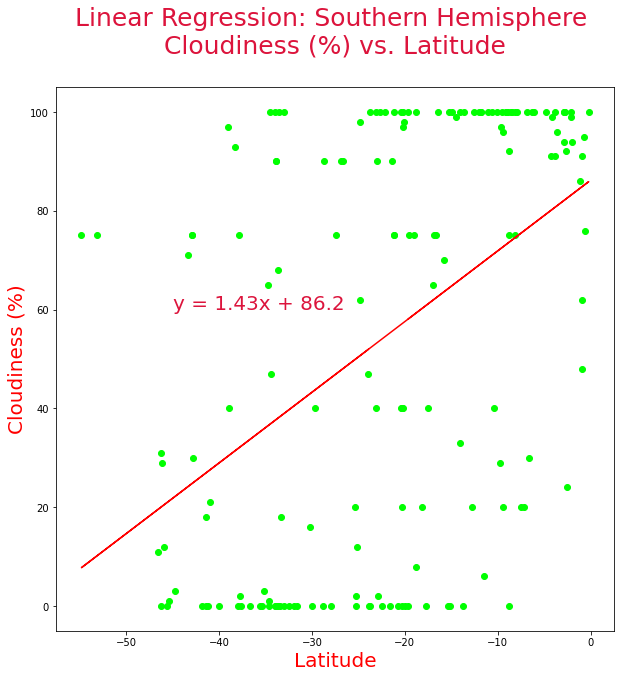

Note: This linear regression is showing the relation between cloudiness (%) and latitude in Southern Hemisphere.


In [52]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_s_hem['Latitude'], cities_data_s_hem['Cloudiness (%)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Cloudiness (%)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Southern Hemisphere \n Cloudiness (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_s_hem['Latitude'], cities_data_s_hem['Cloudiness (%)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_s_hem['Latitude'], slope * cities_data_s_hem['Latitude'] + intercept, color = 'red')

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (-45, 60), fontsize = 20, color = "crimson")

plt.savefig(pro_dir + 'output_images/10_regression_southern_cloud_vs_lat.png')
print(f'Date & Time: ' + (date))
plt.show()
print('Note: This linear regression is showing the relation between cloudiness (%) and latitude in Southern Hemisphere.')

## Linear Regression:
###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression: 0.0073692661306211105
Date & Time: 14-01-2021 12:00:57


<Figure size 432x288 with 0 Axes>

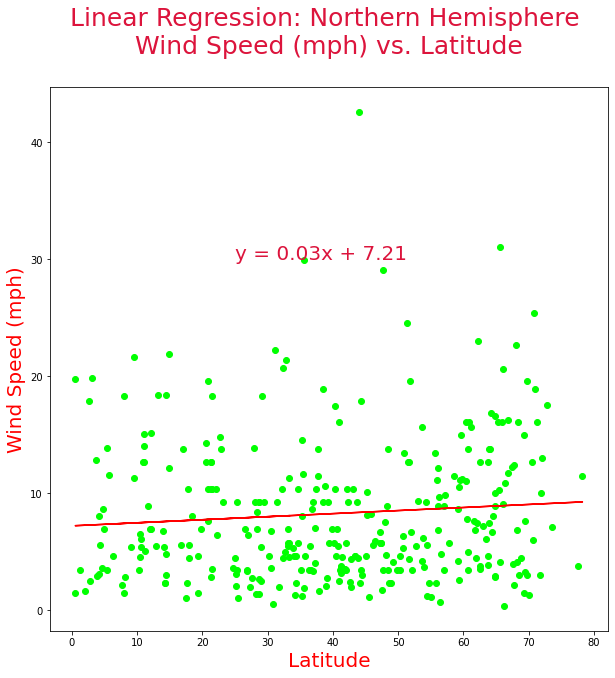

Note: This linear regression is showing the relation between wind speed (mph) and latitude in Northern Hemisphere.


In [53]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_n_hem['Latitude'], cities_data_n_hem['Wind Speed (mph)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Wind Speed (mph)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Northern Hemisphere \n Wind Speed (mph) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_n_hem['Latitude'], cities_data_n_hem['Wind Speed (mph)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_n_hem['Latitude'], slope * cities_data_n_hem['Latitude'] + intercept, color = 'red')

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (25, 30), fontsize = 20, color = "crimson")

plt.savefig(pro_dir + 'output_images/11_regression_northern_windspeed_vs_lat.png')
print(f'Date & Time: ' + (date))
plt.show()
print('Note: This linear regression is showing the relation between wind speed (mph) and latitude in Northern Hemisphere.')

## Linear Regression:
###  Southern Hemisphere - Wind Speed (mph) vs. Latitude

Regression: 0.0779798960912037
Date & Time: 14-01-2021 12:00:57


<Figure size 432x288 with 0 Axes>

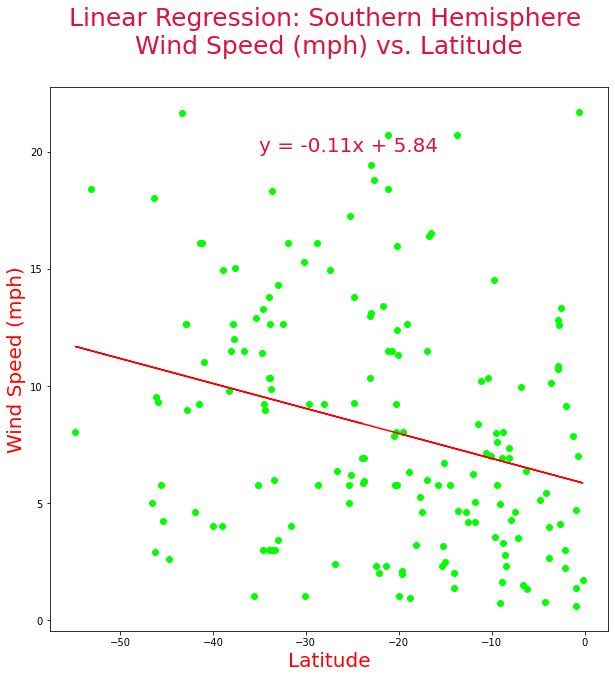

Note: This linear regression is showing the relation between wind speed (mph) and latitude in Southern Hemisphere.


In [54]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_s_hem['Latitude'], cities_data_s_hem['Wind Speed (mph)'], c = 'lime')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Wind Speed (mph)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Southern Hemisphere \n Wind Speed (mph) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_s_hem['Latitude'], cities_data_s_hem['Wind Speed (mph)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_s_hem['Latitude'], slope * cities_data_s_hem['Latitude'] + intercept, color = 'red')

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (-35, 20), fontsize = 20, color = "crimson")

plt.savefig(pro_dir + 'output_images/12_regression_southern_windspeed_vs_lat.png')
print(f'Date & Time: ' + (date))
plt.show()
print('Note: This linear regression is showing the relation between wind speed (mph) and latitude in Southern Hemisphere.')